# Final Project - The Best Neighborhood for Dogs
### By Kishore Annambhotla, Bella DeRubeis, and Dionysios Mallas (Group 6)
---

## Introduction

Our project seeks to determine the Pittsburgh neighborhood **best-suited for dogs.** We decided to approach this question by measuring and analyzing data related to things in the environment that benefit dogs in particular. We decided on this metric because we think it is important that neighborhoods are healthy for humans and animals. We also considered using our project to explore the best neighborhood regarding transportation.

![Dog Walking GIF](https://media.giphy.com/media/7faU8GC6Zp0WI/giphy.gif)

---

## Our Metric & Submetrics

Our overall metric is the quality of a neighborhood for dogs. We decided to measure this with three combined submetrics: **neighborhood crime rate, average daily air quality, and the presence of parks.** Each of these submetrics was measured using datasets from the **Western Pennsylvania Regional Data Center (WPRDC):**
* [Public Safety 2010](https://data.wprdc.org/dataset/pgh/resource/204f63f4-296f-4f1d-bbdd-946b183fa5a0)
* [Daily AQI Data](https://data.wprdc.org/dataset/allegheny-county-air-quality/resource/4ab1e23f-3262-4bd3-adbf-f72f0119108b)
* [Allegheny County Parks Outlines](https://data.wprdc.org/dataset/allegheny-county-parks-outlines) and [Pittsburgh Parks](https://data.wprdc.org/dataset/parks1)

---

## Finding The Best Neighborhood

### AQI Data

Given that dogs are active and spend plenty of time outside, air quality is very important in order to maximize a dog's health. Using daily AQI data from the WPRDC, we can measure and compare the **average daily air quality** in various Pittsburgh neighborhoods. Because this dataset ranges from the start of 2016 to the current day, we will only look at the most relevant data **(data from 2024).**

We can also put our data into a **vertical bar chart** to easily compare our measurements.

<Axes: title={'center': 'Average Daily Air Quality in 2024'}, xlabel='Pittsburgh Neighborhood', ylabel='Air Quality Index'>

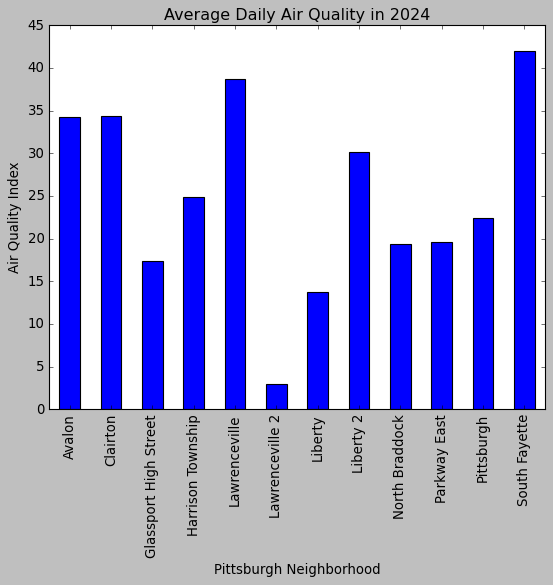

In [57]:
# For data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt

# Read tsv into new data frame
aqi = pd.read_csv("kba32-Personal-Notebook/daily_aqi.tsv", sep="\t")

# Narrow down dataset to current year
start_date = '2024-01-01'
mask_current_year = aqi['date'] >= start_date
aqi_current_year = aqi.loc[mask_current_year]

# Get relevant data series
mean_aqi_current_year = aqi_current_year.groupby(['site'])['index_value'].mean('index_value')

# Create data visualization
plt.style.use('classic')
mean_aqi_current_year.plot(kind='bar', 
                           title='Average Daily Air Quality in 2024',
                           ylabel='Air Quality Index',
                           xlabel='Pittsburgh Neighborhood')

Even through the measurements for Lawrenceville 2 and Liberty are the best in the dataset, the measurements for Lawrenceville and Liberty 2 are significantly worse. When combined, the data tells us that the air quality in Lawrenceville and Liberty is somewhat variable and may not be able to be accurately determined. As a result, we decided that, among neighborhoods in this dataset, **Glassport** has the best air quality in 2024, making it a good candidate for the best Pittsburgh neighborhood for dogs.

### Safety

For dog owners, **safety** is a key factor when choosing where to live or walk their pets. A **safe neighborhood** means fewer risks during dog walks and a more relaxed experience for both the dog and the owner. To measure safety, we analyzed **crime data** from the **Public Safety 2010** dataset.

<img src="https://media.giphy.com/media/XtX936H4lzr5fUgJOR/giphy.gif" width="300">

To find the **safest neighborhoods**, I used crime data from the **Public Safety 2010 dataset**. I combined **major and minor crime reports** and calculated the **crime rate per 100 people** for each neighborhood. The neighborhoods with the **lowest crime rates** were considered the **safest**.


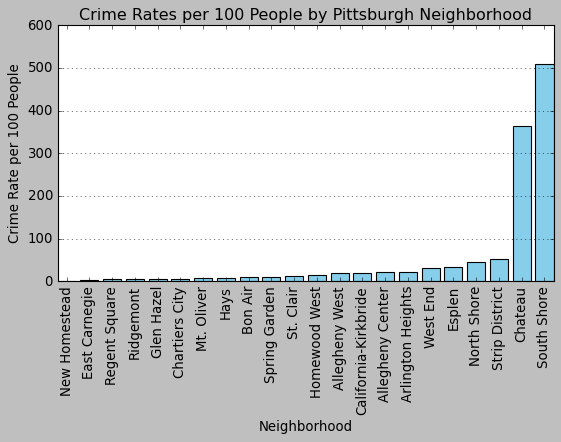

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Loads the crime data
file_path = 'ISD10-Personal-Notebook/safety_data.csv'
safe_neighborhoods = pd.read_csv(file_path)

# Converts columns to numbers 
df['#Part 1 (Major Crime) Reports (2010)'] = pd.to_numeric(df['#Part 1 (Major Crime) Reports (2010)'], errors='coerce')
df['#Part 2 Reports (2010)'] = pd.to_numeric(df['#Part 2 Reports (2010)'], errors='coerce')
df['Population (2010)'] = pd.to_numeric(df['Population (2010)'], errors='coerce')

# Calculates total crime and crime rate per 100 people
df['Total Crime'] = df['#Part 1 (Major Crime) Reports (2010)'] + df['#Part 2 Reports (2010)']
df['Crime Rate per 100 People'] = (df['Total Crime'] / df['Population (2010)']) * 100

# Filters out empty neighborhood names and sort by crime rate
df_filtered = df[df['Neighborhood'].notna()]
safe_neighborhoods = df_filtered[['Neighborhood', 'Crime Rate per 100 People']].sort_values(by='Crime Rate per 100 People')

# Sets the size of the chart
plt.figure(figsize=(8, 4))

# Creates the bar chart showing crime rates for each neighborhood
plt.bar(safe_neighborhoods['Neighborhood'], safe_neighborhoods['Crime Rate per 100 People'], color='skyblue')

# Rotates the neighborhood names for better readability
plt.xticks(rotation=90)

# Adds title and labels to the chart
plt.title('Crime Rates per 100 People by Pittsburgh Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Crime Rate per 100 People')

# Adds a horizontal grid to make the chart easier to read
plt.grid(axis='y')

# Displays the chart
plt.show()

**New Homestead** was identified as the **safest neighborhood**, which makes it a great choice for dog owners looking for a **secure place** for outdoor activities. **Safety** is crucial for dog owners, and New Homestead’s **low crime rate** suggests it is an excellent option for a **dog-friendly environment**. However, this analysis used data from **2010**, so recent changes in safety might not be reflected.

### Park Data

My data listed all of the parks of Pittsburgh. Unlike air quality or safety, the list of parks included information such as each parks' name, size, location, etc., which can make it difficult to find a 'best' neighborhood only based off of this information. However, we can look at the area of each park to see which is biggest:

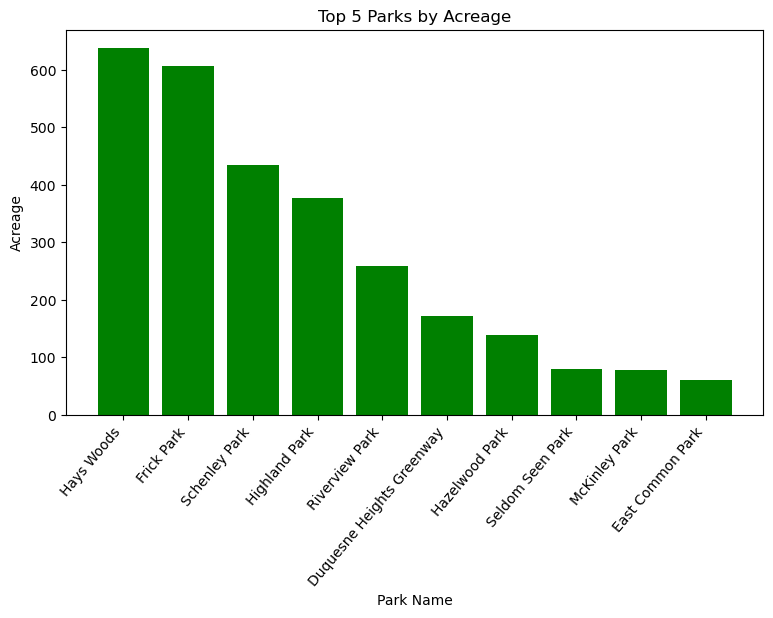

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

parks = pd.read_csv("park-data.csv", sep=",")

parks_area_sorted = parks.sort_values(by='acreage', ascending=False)

# Extract the data
top_10_parks = parks_area_sorted[['origpkname', 'acreage']].head(10)


# Create the bar graph
plt.figure(figsize=(9, 5))  # Adjust the size of the plot
plt.bar(top_10_parks['origpkname'], top_10_parks['acreage'], color='green')

# Add labels and title
plt.xlabel('Park Name')
plt.ylabel('Acreage')
plt.title('Top 5 Parks by Acreage')
plt.xticks(rotation=50, ha='right')  # Rotate the park names for better visibility

plt.show()

Looking at this bar graph, we can see that **Hays Woods** is the largest park in Pittsburgh by area. According to both of the other data sets, **New Homestead** was determined to be the best neighborhood of Pittsburgh, and New Homestead borders Hays Woods, making it ideal for dog owners.

## Conclusions

### Kishore

I focused on analyzing air quality throughout neighborhoods in Pittsburgh and Allegheny County. In my dataset, I determined that **Glassport** was the neighborhood with the **best air quality,** with Liberty and Lawrenceville as close runner-ups. However, our other datasets showed that **New Homestead** was also an excellent candidate for being the best neighborhood for dogs, due to its **level of safety** and **large park presence.** Unfortunately, my dataset was limited and did not feature air quality data on New Homestead. Overall, while the data indicates **New Homestead** to be the best neighborhood for dogs in Pittsburgh, my personal choice would be **Glassport**.

### Bella

For this project, I focused on analyzing **safety** as an important factor for **dog owners**. I found that **New Homestead** has the **lowest crime rate**, making it the **safest neighborhood** in **Pittsburgh** according to our data. **Safety** plays a big role in creating a comfortable environment for dog walks and outdoor activities. However, the data I used is from **2010**, so recent changes in crime rates might not be reflected. If I were to expand on this analysis, I would include more **recent crime data** to get a better understanding of current safety trends in the neighborhoods.

### Dio

My focus for this project was to see how close neighborhoods are to parks and how big the parks are. While there are plenty of neighborhoods that border large parks throughout the Pittsburgh area, few also scored well in the other two categories. All things considered, I believe that **New Homestead** is the best neighborhood of Pittsburgh for Dogs. On top of the reason given for the other two data groups, New Homestead directly borders **Hays Woods**, the largest park in Pittsburgh by area. This would make it a perfect neighborhood for dog owners.   